<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 24 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 November 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [358]:
# Isi dengan data diri Anda
NAMA = "Jeremy Mervin Juniandi Sitorus"
KELAS = "E"
NPM = "2106654675"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [359]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Jeremy Mervin Juniandi Sitorus dari kelas E dengan NPM 2106654675, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Jeremy Mervin Juniandi Sitorus)


## Intro to Linear Models for Regression and Classification

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

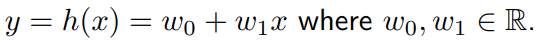

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

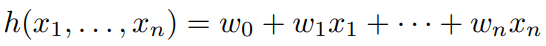

atau

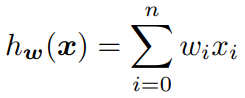

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

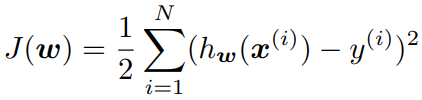

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

In [360]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



# Membuat data buatan dengan beberapa noises yang disengaja

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
X_train  = X.reshape(-1, 1)
y_train  = np.array([5, 7, 5, 9, 10, 4, 3, 11, 11,  2])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 5  7  5  9 10  4  3 11 11  2]


In [361]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [362]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [2.04166667]
Intersep persamaan linear: 
 0.5749999999999993


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

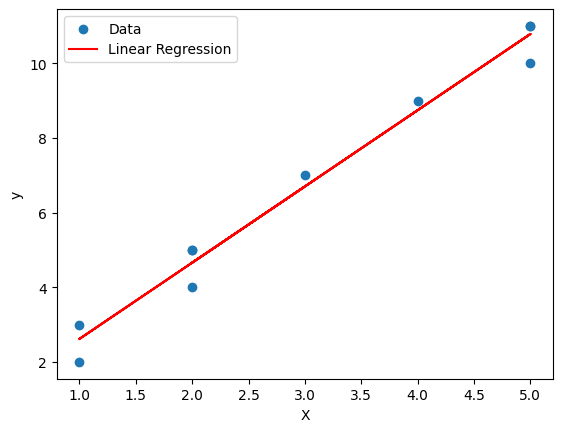

In [363]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [364]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([5, 9, 15])

y_predict = linear.predict(X_test)

print(y_predict)

[ 4.65833333  8.74166667 14.86666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [365]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9960279605263158


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

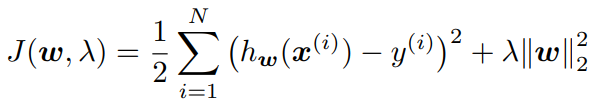

- Lasso Regression

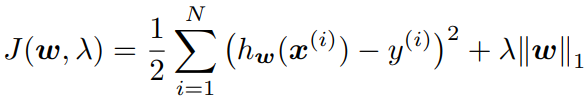

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [366]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [367]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.88461538]
Intersep persamaan regresi ridge: 
 1.046153846153846


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

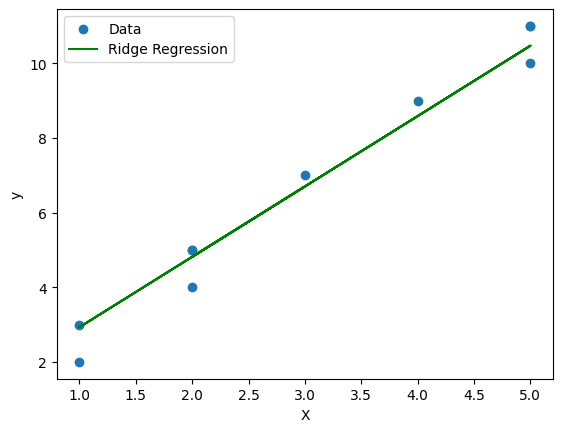

In [368]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [369]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [370]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.20833333]
Intersep persamaan regresi lasso: 
 3.075


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

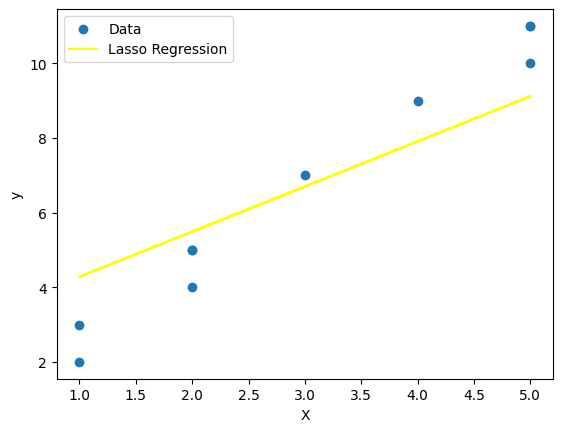

In [371]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

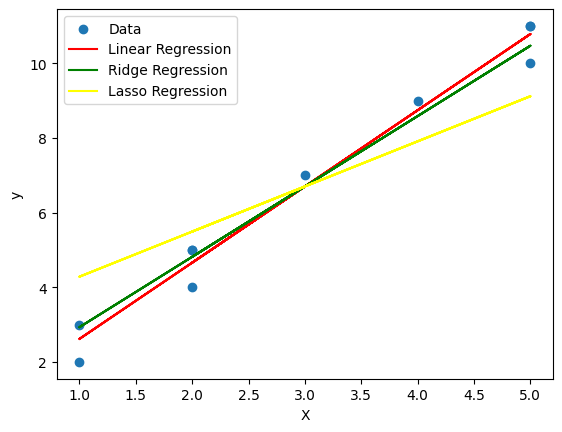

In [372]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data harga dan atribut dari sekitar 54000 berlian. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Price:** Harga berlian dalam satuan dolar AS (\$326 — \$18,823)

- **Carat:** Berat/Bobot berlian (0.2 — 5.01)

- **Cut:** Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)

- **Color:** Kualitas warna berlian, dari J (paling buruk) hingga D (paling baik)

- **Clarity:** Ukuran seberapa jernih berlian (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (paling baik))

- **X:** Ukuran panjang berlian dalam satuan mm (0 — 10.74)

- **Y:** Ukuran lebar berlian dalam satuan mm (0 — 58.9)

- **Z:** Ukuran kedalaman berlian dalam satuan mm (0 — 31.8)

- **Depth:** Persentase total dari kedalaman berlian =  100 * z / mean(x, y)  (43 — 79)

- **Table:** Lebar bagian atas berlian relatif terhadap titik terlebar (43 — 95)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/shivam2503/diamonds
<br/> <br/>
<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" alt="Struktur Berlian"/>

In [373]:
# Import dataset diamonds dan menampilkan 5 row teratas

df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [374]:
# Menampilkan informasi keseluruhan terkait dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Melakukan encoding pada data kategorikal
- Melakukan feature selection, pilih fitur-fitur yang relevan dalam memprediksi harga berlian (`price`)
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada data selain data kategorikal. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [375]:
df_diamond['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [376]:
le = LabelEncoder()

df_diamond['cut'] = df_diamond['cut'].replace({'Fair':1, 'Ideal':2, 'Good':3, 'Very Good':4, 'Premium':5})
df_diamond['color'] = df_diamond['color'].replace({'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1})
df_diamond['clarity'] = df_diamond['color'].replace({'I1':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'IF':1})
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,6,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,6,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,1,1,63.3,58.0,335,4.34,4.35,2.75


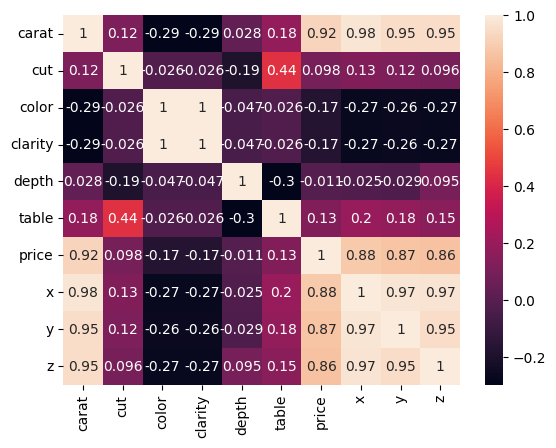

In [377]:
corr_heatmap = sns.heatmap(df_diamond.corr(), annot=True)

In [378]:
x = np.array(df_diamond.drop(columns=["price", "x", "y", "z"]))
y = df_diamond['price']
x

array([[ 0.23,  2.  ,  6.  ,  6.  , 61.5 , 55.  ],
       [ 0.21,  5.  ,  6.  ,  6.  , 59.8 , 61.  ],
       [ 0.23,  3.  ,  6.  ,  6.  , 56.9 , 65.  ],
       ...,
       [ 0.7 ,  4.  ,  7.  ,  7.  , 62.8 , 60.  ],
       [ 0.86,  5.  ,  3.  ,  3.  , 61.  , 58.  ],
       [ 0.75,  2.  ,  7.  ,  7.  , 62.2 , 55.  ]])

In [379]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.size

10788

In [380]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `price` sebagai target prediksi. Tampilkan hasil prediksinya pada keseluruhan data uji.

In [381]:
linear = LinearRegression()
linear.fit(x_train, y_train)

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 3.84796069e+03  1.43107935e+01 -4.82289407e+14  4.82289407e+14
 -1.98210349e+02 -2.47835348e+02]
Intersep persamaan linear: 
 3939.490707267409


In [382]:
test_pred = linear.predict(x_test)
test_pred

array([-600.7245546 , 2611.94938736, 1303.94732017, ..., -118.67661937,
       7860.63814652, 5013.78850041])

b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

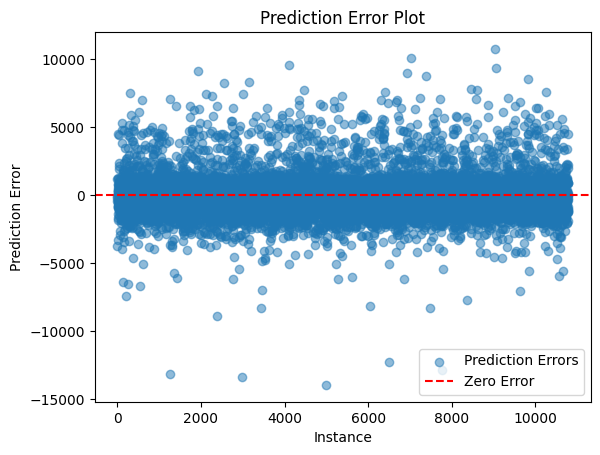

In [383]:
errors = y_test - test_pred

plt.scatter(np.arange(len(errors)), errors, label="Prediction Errors", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Instance")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Plot")
plt.legend()
plt.show()

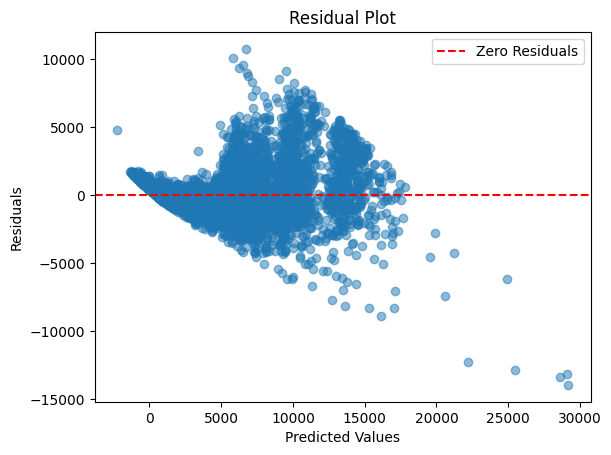

In [384]:
residuals = y_test - test_pred

plt.scatter(test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [385]:
print("R-squared:", metrics.r2_score(y_test, test_pred))

R-squared: 0.8629166996055722


In [386]:
from sklearn.model_selection import cross_val_score


cross_val_r2_scores = cross_val_score(linear, x_train, y_train, cv=3, scoring='r2')
mean_r2_score = np.mean(cross_val_r2_scores)
print("Mean R-squared score:", mean_r2_score)

Mean R-squared score: 0.8637862289872024


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [387]:
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [388]:
lasso_models = {}

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)

    lasso_models[alpha] = lasso

lasso_models

{0.1: Lasso(alpha=0.1),
 0.5: Lasso(alpha=0.5),
 1.0: Lasso(),
 2.0: Lasso(alpha=2.0),
 5.0: Lasso(alpha=5.0)}

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [389]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [390]:
for alpha, model in lasso_models.items():
    test_pred_lasso = model.predict(x_test)
    print(f"Lasso with Alpha: {alpha}")
    regression_metrics(test_pred_lasso, y_test)
    print("=======================")

Lasso with Alpha: 0.1
MAE: 991.6734633793158
MSE: 2179179.0683736494
RMSE: 1476.2042773185726
R_squared: 0.862917308654745
Lasso with Alpha: 0.5
MAE: 991.5293331701323
MSE: 2179157.337659907
RMSE: 1476.1969169659944
R_squared: 0.8629186756395735
Lasso with Alpha: 1.0
MAE: 991.3515727346781
MSE: 2179135.0920622554
RMSE: 1476.1893821804354
R_squared: 0.8629200750135124
Lasso with Alpha: 2.0
MAE: 990.9943658736288
MSE: 2179101.694630359
RMSE: 1476.1780700953252
R_squared: 0.862922175900913
Lasso with Alpha: 5.0
MAE: 989.9474319425435
MSE: 2179106.608353089
RMSE: 1476.1797344338152
R_squared: 0.8629218667999556


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [391]:
lasso = Lasso(alpha=2.0)


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [392]:
lasso.fit(x_train, y_train)
test_pred_lasso = lasso.predict(x_test)
test_pred_lasso

array([-595.33287011, 2606.32204442, 1302.91719894, ..., -110.94531467,
       7853.89048546, 5023.86963089])

f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

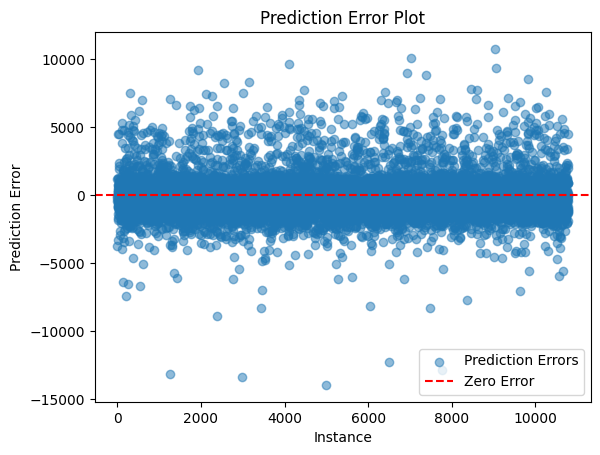

In [393]:
errors = y_test - test_pred_lasso

plt.scatter(np.arange(len(errors)), errors, label="Prediction Errors", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Instance")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Plot")
plt.legend()
plt.show()

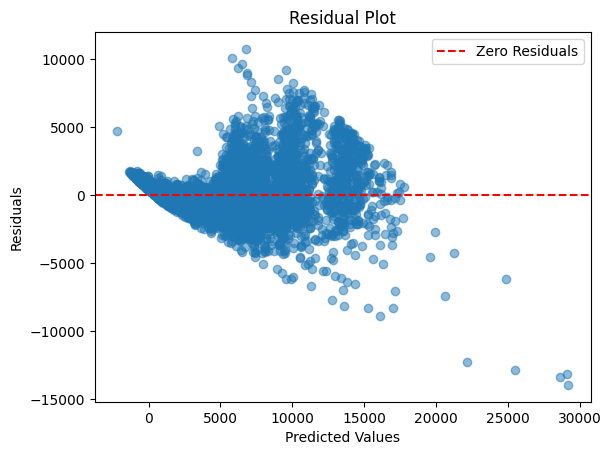

In [394]:
residuals = y_test - test_pred_lasso

plt.scatter(test_pred_lasso, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

**Alpha** pada lasso regression adalah parameter yang digunakan untuk mengendalikan regularization yang diterapkan model. Pada regresi Lasso menggunakan regularization L1.

* **Alpha kecil**.

Alpha yang lebih kecil memiliki regularization yang lebih lemah. Semakin mendekati nol, dampak alpha menjadi lebih kecil dan cenderung berperilaku lebih mirip seperti linear regression biasa. Dapat dilihat nilai R-squared lasso(alpha=0.1) mirip dengan R-squared linear regression biasa, yaitu sekitar *0.862917*. Model mungkin lebih sesuai dengan training data tetapi juga lebih rentan terhadap overfitting.
* **Alpha besar**.


Alpha yang lebih besar memiliki regularization yang lebih kuat. Semakin besar nilai alpha, dampak alpha menjadi lebih signifikan dan cenderung lebih banyak mendorong koefisien ke arah nol. Dengan alpha yang lebih besar, model dapat mencegah overfitting dengan mempromosikan model yang lebih sederhana dengan lebih sedikit koefisien non-nol. Dapat dilihat, hasil R-squared trus bertambah selaras dengan nilai alpha hingga puncaknya di lasso(alpha=2.0), kemudian turun pada lasso(alpha=5) karena model menjadi terlalu sederhana dan kehilangan kemampuan untuk menjelaskan variasi dalam data.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [395]:
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [396]:
ridge_models = {}

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)

    ridge_models[alpha] = ridge

ridge_models

{0.1: Ridge(alpha=0.1),
 0.5: Ridge(alpha=0.5),
 1.0: Ridge(),
 2.0: Ridge(alpha=2.0),
 5.0: Ridge(alpha=5.0)}

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [397]:
for alpha, model in ridge_models.items():
    test_pred_ridge = model.predict(x_test)
    print(f"Ridge with Alpha: {alpha}")
    regression_metrics(test_pred_ridge, y_test)
    print("=======================")

Ridge with Alpha: 0.1
MAE: 991.7072868417181
MSE: 2179184.1799408533
RMSE: 1476.2060086386498
R_squared: 0.862916987108251
Ridge with Alpha: 0.5
MAE: 991.6994872459403
MSE: 2179181.8141037356
RMSE: 1476.2052073149368
R_squared: 0.8629171359327896
Ridge with Alpha: 1.0
MAE: 991.6897380099738
MSE: 2179178.86126802
RMSE: 1476.2042071705457
R_squared: 0.8629173216828608
Ridge with Alpha: 2.0
MAE: 991.6702404005085
MSE: 2179172.970463861
RMSE: 1476.20221191538
R_squared: 0.8629176922477676
Ridge with Alpha: 5.0
MAE: 991.611754470923
MSE: 2179155.416958113
RMSE: 1476.1962664084044
R_squared: 0.862918796462582


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [398]:
ridge = Ridge(alpha=5.0)

e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [399]:
ridge.fit(x_train, y_train)
test_pred_ridge = ridge.predict(x_test)
test_pred_ridge

array([-600.17849818, 2612.03582088, 1304.21445021, ..., -117.57689774,
       7859.96569011, 5013.60237009])

f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

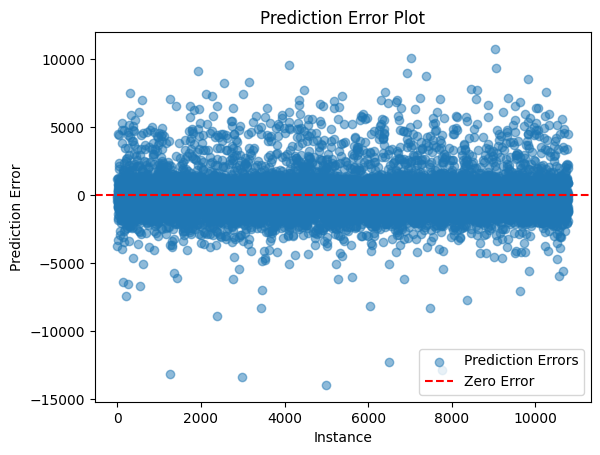

In [400]:
errors = y_test - test_pred_ridge

plt.scatter(np.arange(len(errors)), errors, label="Prediction Errors", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Instance")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Plot")
plt.legend()
plt.show()

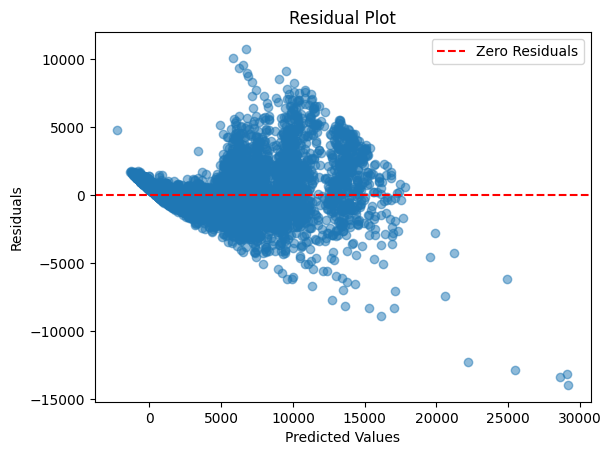

In [401]:
residuals = y_test - test_pred_ridge

plt.scatter(test_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

**Alpha** pada **ridge regression** tidak jauh berbeda dengan alpha pada lasso. Namun, pada regresi ridge menggunakan regularization L2 yang mana alpha dikalikan dengan norma L2 dari vektor koefisien
* **Alpha kecil**.

Alpha yang lebih kecil memiliki regularization yang lebih lemah. Semakin mendekati nol, dampak alpha menjadi lebih kecil dan cenderung berperilaku lebih mirip seperti linear regression biasa. Dapat dilihat nilai R-squared lasso(alpha=0.1) mirip dengan R-squared linear regression biasa, yaitu sekitar *0.862916*, bahkan dibawah R-squared linear regression biasa. Model mungkin lebih sesuai dengan training data tetapi juga lebih rentan terhadap overfitting.
* **Alpha besar**.

Alpha yang lebih besar memiliki regularization yang lebih kuat. Semakin besar nilai alpha, dampak alpha menjadi lebih signifikan dan cenderung lebih banyak mendorong koefisien ke arah nol, namun tidak sampai tepat nol seperti lasso. Dengan alpha yang lebih besar, model dapat mencegah overfitting dengan mempromosikan model yang lebih sederhana dengan lebih sedikit koefisien non-nol. Dapat dilihat, hasil R-squared trus bertambah selaras dengan nilai alpha.

h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso regression dapat dijadikan model untuk feature selection karena menggunakan regularisasi L1, yang cenderung mendorong beberapa koefisien fitur menjadi tepat nol. Dengan kata lain, Lasso memiliki kemampuan untuk secara langsung menghilangkan beberapa fitur yang dianggap tidak relevan atau memiliki dampak kecil terhadap variabel respons. Sebaliknya, ridge regression menggunakan regularisasi L2, yang membatasi koefisien fitur tetapi tidak cenderung membuat mereka nol secara tepat. Oleh karena itu, ridge regression lebih cenderung mempertahankan semua fitur dalam modelnya. Sehingga, sifat L1 regularization pada lasso regression memudahkan proses seleksi fitur, sementara ridge regression cenderung mempertahankan semua fitur dengan memberikan bobot yang lebih kecil pada fitur yang mungkin kurang penting.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

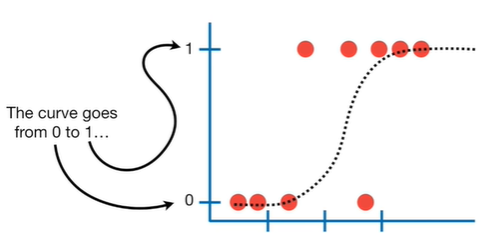

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

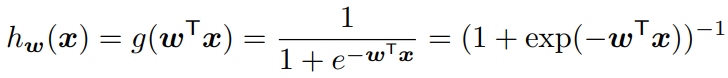

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

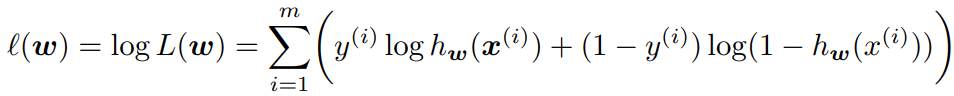

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [402]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 4, 2, 3, 5, 6, 7, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[2 3]
 [3 4]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 7]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 0 0 1 1 0 0 1 1 1]


In [403]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [404]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 5], [3, 6]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [405]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-4.475384273860628, 1.404075585690601, -0.12235462027224138]


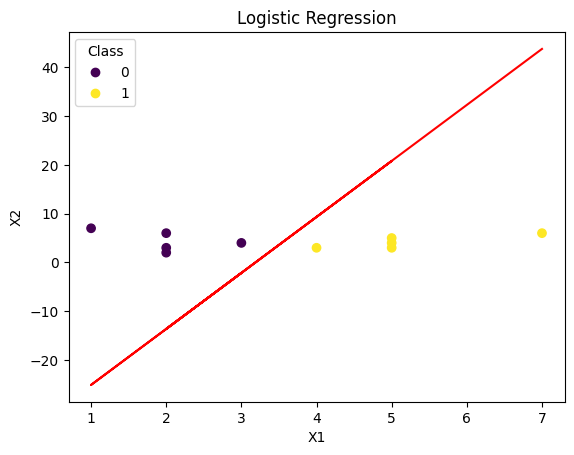

In [406]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [407]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian logistic regression adalah data terkait *diabetes*. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **gender**: jenis kelamin biologis seseorang, yang dapat berdampak pada kerentanan mereka terhadap diabetes.

- **age**: usia, berkisar antara 0-80 tahun.

- **hypertension**: hipertensi (kondisi medis di mana tekanan darah di arteri terus meningkat). 0 = tidak menderita hipertensi, sedangkan 1 = menderita hipertensi.

- **heart_disease**: penyakit jantung. 0 = tidak menderita penyakit jantung, sedangkan 1 = menderita penyakit jantung.

- **smoking_history**: riwayat merokok, ada 6 kategori yaitu: not current,former, No Info, current, never, ever.

- **bmi**: Body Mass Index (pengukuran lemak tubuh berdasarkan berat dan tinggi badan). Kisaran BMI pada dataset adalah 10,16 hingga 71,55. BMI kurang dari 18,5 berarti kurus, 18,5-24,9 normal, 25-29,9 kelebihan berat badan, dan 30 atau lebih berarti obesitas.

- **HbA1c_level**: Tingkat HbA1c (Hemoglobin A1c) ( ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir)

- **blood_glucose_level**: Tingkat glukosa pada darah.

- **diabetes**: diabetes, 0 = tidak terindikasi diabetes, sedangkan 1 = terindikasi hipertensi.


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [408]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,48.0,0,0,ever,27.32,6.2,145,0
1,Female,44.0,0,1,ever,31.92,6.1,100,0
2,Female,61.0,0,0,No Info,27.32,4.8,159,0
3,Female,71.0,1,0,never,23.96,4.5,85,0
4,Female,51.0,0,0,current,28.49,6.1,200,0


In [409]:
# Menampilkan informasi keseluruhan terkait dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


#### Soal 5: Logistic Regression

a) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [410]:
df_diabetes['smoking_history'].unique()

array(['ever', 'No Info', 'never', 'current', 'former', 'not current'],
      dtype=object)

In [411]:
df_diabetes['gender'] = df_diabetes['gender'].replace({'Male':0, 'Female':1})
df_diabetes['smoking_history'] = df_diabetes['smoking_history'].replace({'No Info':0, 'never':1, 'ever':2, 'former':3, 'not current':4, 'current':5})
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,48.0,0,0,2,27.32,6.2,145,0
1,1,44.0,0,1,2,31.92,6.1,100,0
2,1,61.0,0,0,0,27.32,4.8,159,0
3,1,71.0,1,0,1,23.96,4.5,85,0
4,1,51.0,0,0,5,28.49,6.1,200,0


In [412]:
x = df_diabetes.drop(columns="diabetes")
y = df_diabetes["diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [413]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(x_train, y_train)

#predict
diabetes_test_pred = logistic.predict(x_test)
diabetes_test_pred

array([1, 0, 1, ..., 0, 0, 0])

In [414]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [415]:
# Confusion matrix
evaluate_classifier_performance(diabetes_test_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1687
           1       0.89      0.88      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



Confusion Matrix



prediction,0,1
actual,,
0,1501,186
1,202,1511




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8858823529411765
F1 Macro Average: 0.8858813657557592
F1 Micro Average: 0.8858823529411765
Precision Macro Average: 0.8858903020805255
Precision Micro Average: 0.8858823529411765
Recall Macro Average: 0.8859116674988952
Recall Micro Average: 0.8858823529411765



In [416]:
# Evaluation metrics
regression_metrics(diabetes_test_pred, y_test)

MAE: 0.11411764705882353
MSE: 0.11411764705882353
RMSE: 0.33781303565555837
R_squared: 0.5435027169408868


c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [417]:
from sklearn.preprocessing import MinMaxScaler

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

numerical = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = MinMaxScaler()

x_train_scaled[numerical] = scaler.fit_transform(x_train_scaled[numerical])
x_test_scaled[numerical] = scaler.transform(x_test_scaled[numerical])

x_test_scaled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
10941,0,1.000000,1,0,3,0.210188,0.854545,0.272727
5250,0,0.774775,0,0,0,0.210188,0.181818,0.359091
10292,1,0.687187,1,0,1,0.210188,0.963636,0.636364
2266,1,0.449449,0,0,1,0.152688,0.090909,0.045455
6398,1,0.336837,0,0,5,0.261641,0.418182,0.209091
...,...,...,...,...,...,...,...,...
4706,1,1.000000,0,0,0,0.210188,0.563636,0.272727
8404,1,0.687187,1,0,5,0.215462,0.236364,0.090909
11114,1,0.499499,0,0,1,0.210188,0.400000,0.545455
7877,0,0.574575,1,0,1,0.148829,0.472727,0.090909


d) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [418]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(x_train_scaled, y_train)

diabetes_scaled_test_pred = logistic.predict(x_test_scaled)
diabetes_scaled_test_pred

array([1, 0, 1, ..., 0, 0, 0])

In [419]:
# Confusion matrix
evaluate_classifier_performance(diabetes_scaled_test_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1687
           1       0.89      0.88      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



Confusion Matrix



prediction,0,1
actual,,
0,1499,188
1,202,1511




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8852941176470588
F1 Macro Average: 0.8852926887670574
F1 Micro Average: 0.8852941176470588
Precision Macro Average: 0.8852965001025952
Precision Micro Average: 0.8852941176470588
Recall Macro Average: 0.8853188992712722
Recall Micro Average: 0.8852941176470588



In [420]:
regression_metrics(diabetes_scaled_test_pred, y_test)

MAE: 0.11470588235294117
MSE: 0.11470588235294117
RMSE: 0.33868256871728897
R_squared: 0.5411496381622316


e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

Secara umum, kedua model di atas (standarisasi dan tidak terstandarisasi) tidak memiliki perbedaan yang signifikan, namun model logistik regression tanpa standarisasi menghasilkan performa yang sedikit lebih baik daripada yang terstandarisasi. Pada dataset ini, mungkin saja standarisasi tidak terlalu berdampak karena fitur numerik tidak memiliki range (minimum dan maximum) yang besar, sehingga standarisasi mengubah informasi-informasi menjadi terlalu sederhana.

In [421]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = dict(check_outlier(df_diabetes).sum())

Outlier pada tiap atribut:
gender                    0
age                       0
hypertension           2615
heart_disease          1557
smoking_history           0
bmi                    1026
HbA1c_level            3486
blood_glucose_level       0
diabetes                  0
dtype: int64


**'age' dan 'blood_glucose_level' tidak memiliki outlier, jadi fitur-fitur tersebut tidak perlu distandarisasi.**

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

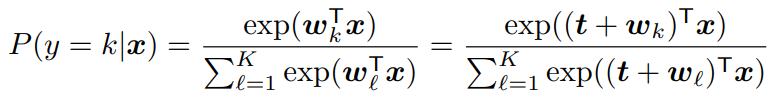

Persamaan likelihood softmaxe regression:

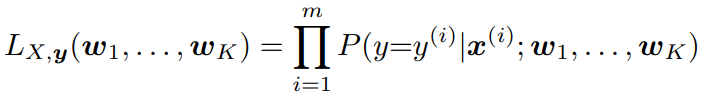

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [422]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([0, 1, 0, 2, 2, 1, 0, 2, 2, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 1 0 2 2 1 0 2 2 2]


In [423]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [424]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [425]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.69333009 -2.77478855 -1.91854154] [[-0.7077521  -0.62923839]
 [-0.31769488  0.84892058]
 [ 1.02544698 -0.21968219]]


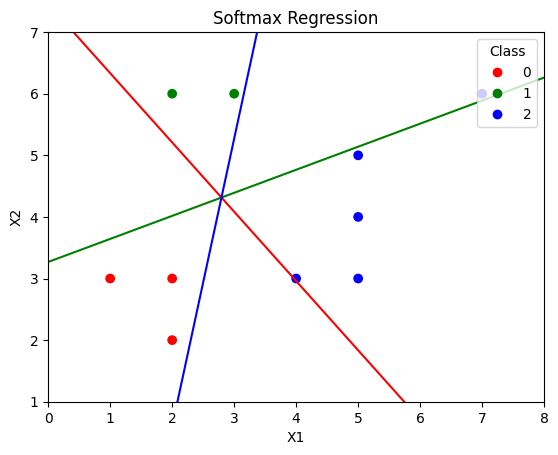

In [426]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

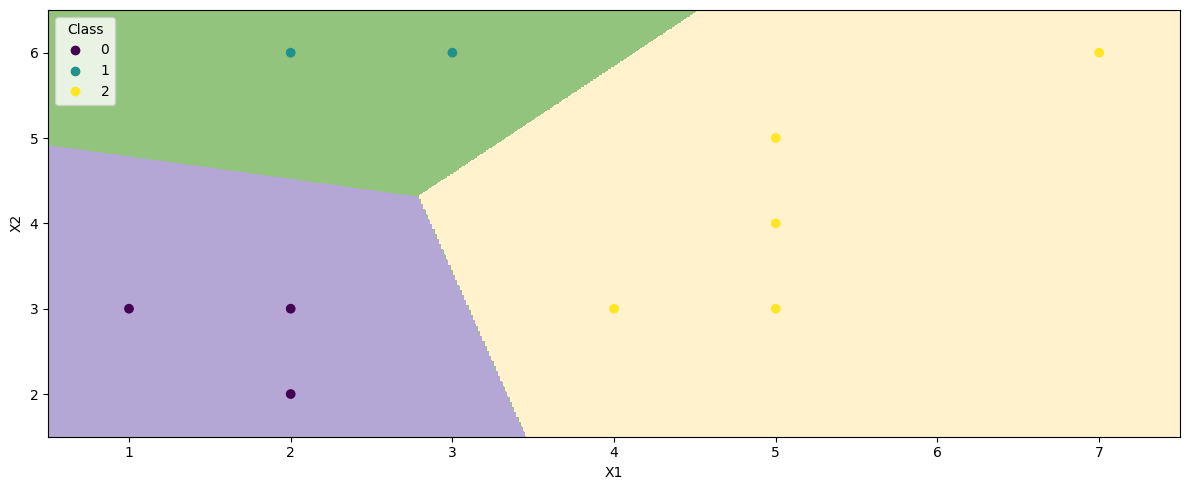

In [427]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [428]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

Dataset yang digunakan pada bagian softmax regression adalah data terkait gambar dari dry beans. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Area (A)**: Luas zona kacang dan jumlah piksel dalam batasnya.

- **Perimeter (P)**: Keliling kacang didefinisikan sebagai panjang tepinya.

- **Major axis length (L)**: jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari kacang.

- **Minor axis length (l)**: Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.

- **Aspect ratio (K)**: Mendefinisikan hubungan antara L dan l.

- **Eccentricity (Ec)**: Eksentrisitas elips yang momennya sama dengan daerah.

- **Convex area (C)**: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.

- **Equivalent diameter (Ed)**: Diameter lingkaran yang luasnya sama dengan luas biji kacang.

- **Extent (Ex)**: Rasio piksel dalam kotak pembatas pada area kacang.

- **Solidity (S)**: Soliditas juga dikenal sebagai konveksitas, yaitu rasio piksel pada cangkang cembung dengan piksel pada kacang.

- **Roundness (R)**: Dihitung dengan rumus  (4*pi*A)/(P^2) dengan A adalah Area dan P adalah perimeter

- **Compactness (CO)**: Mengukur kebulatan suatu benda

- **ShapeFactor1 (SF1)**: Ukuran kacang

- **ShapeFactor2 (SF2)**: Ukuran kacang

- **ShapeFactor3 (SF3)**: Ukuran kacang

- **ShapeFactor4 (SF4)**: Ukuran kacang

- **Class**: Jenis Kacang, (0 = Seker, 1 = Barbunya, 2 = Bombay, 3 = Cali, 4 = Dermason, 5 = Horoz, dan 6 = Sira)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset
<br/> <br/>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg?t=2022-04-02-23-21-35" alt="Seker Dry Beans" width=300/>


In [429]:
import pandas as pd

# Import dataset dry beans dan menampilkan 5 row teratas
df_beans = pd.read_csv('dry_beans_dataset.csv')

# Melakukan encoding pada tiap label
df_beans["Class"] = df_beans["Class"].map({
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "DERMASON": 4,
    "HOROZ": 5,
    "SIRA": 6
})

df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [430]:
# Menampilkan informasi keseluruhan terkait dataset
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [431]:
x = df_beans.drop(columns="Class")
y = df_beans["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [432]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

x_test_scaled

array([[0.09359255, 0.14821646, 0.13795034, ..., 0.59276928, 0.68019383,
        0.99327901],
       [0.20421783, 0.38614602, 0.33636012, ..., 0.25059572, 0.38865068,
        0.74289604],
       [0.07445046, 0.125959  , 0.11675482, ..., 0.61395107, 0.65286389,
        0.97121828],
       ...,
       [0.03412526, 0.06728585, 0.0787161 , ..., 0.59784091, 0.50805483,
        0.96583475],
       [0.23170336, 0.35755501, 0.38782395, ..., 0.19665729, 0.32415939,
        0.86503513],
       [0.08159832, 0.14882031, 0.17062906, ..., 0.4086791 , 0.41761144,
        0.94564195]])

c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [433]:
softmax = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')
softmax.fit(x_train_scaled, y_train)

beans_test_pred = softmax.predict(x_test_scaled)
beans_test_pred

array([0, 1, 0, ..., 4, 3, 6])

In [434]:
evaluate_classifier_performance(beans_test_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       413
           1       0.94      0.89      0.91       261
           2       1.00      1.00      1.00       117
           3       0.93      0.94      0.94       317
           4       0.91      0.90      0.91       671
           5       0.97      0.96      0.97       408
           6       0.84      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,386,5,0,0,12,0,10
1,2,232,0,17,0,1,9
2,0,0,117,0,0,0,0
3,0,9,0,299,0,4,5
4,11,0,0,0,603,0,57
5,0,0,0,4,4,392,8
6,8,1,0,0,41,7,479




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9210429673154609
F1 Macro Average: 0.9332830380092716
F1 Micro Average: 0.921042967315461
Precision Macro Average: 0.9356132079939916
Precision Micro Average: 0.9210429673154609
Recall Macro Average: 0.9314044286164062
Recall Micro Average: 0.9210429673154609



In [435]:
regression_metrics(beans_test_pred, y_test)

MAE: 0.2052882849798017
MSE: 0.6907822254865956
RMSE: 0.8311330973355565
R_squared: 0.8358793683495337


d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.


***Softmax Regression (Multinomial):***

- Merupakan ekstensi regresi logistik untuk masalah klasifikasi dengan lebih dari dua kelas.
- Menggunakan fungsi softmax untuk menghasilkan distribusi probabilitas kelas di antara semua kelas yang mungkin.
- Parameter model, berupa bobot dan bias, diperlakukan sebagai matriks.


***Logistic Regression (Binomial):***

- Dirancang khusus untuk masalah klasifikasi biner.
- Menggunakan fungsi logistik untuk memodelkan probabilitas kelas positif.
- Parameter model diukur untuk setiap fitur, bukan matriks seperti dalam regresi softmax.

Perbedaan utama terletak pada penanganan kelas yang berbeda dan representasi parameter model. Regresi softmax cocok untuk kasus klasifikasi multikelas sementara regresi logistik digunakan untuk masalah klasifikasi biner.

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi serta sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/09051471139246639e739754ced8691a)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [436]:
df_test = pd.read_csv('co2_emissions_test.csv')
df_train = pd.read_csv('co2_emissions_train.csv')

df_train

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,4030,MAZDA,MAZDA3 5-DOOR,MID-SIZE,2.5,4,AS6,X,9.0,6.7,7.8,36,183
5904,2940,MAZDA,CX-3,COMPACT,2.0,4,AS6,X,8.2,6.7,7.6,37,179
5905,1334,CHEVROLET,MALIBU,MID-SIZE,2.5,4,AS6,X,9.3,6.4,8.0,35,184
5906,1579,HONDA,FIT,STATION WAGON - SMALL,1.5,4,AV,X,7.0,5.7,6.4,44,147


In [437]:
df_train["Transmission"].unique()

array(['AS6', 'AS7', 'AV', 'AS8', 'A5', 'A9', 'AS10', 'A4', 'M6', 'AM7',
       'A6', 'M7', 'AM6', 'AM8', 'A8', 'M5', 'AV6', 'AV7', 'AV8', 'AM5',
       'AV10', 'A7', 'AS5', 'A10', 'AM9', 'AS9', 'AS4'], dtype=object)